In [1]:
import pylab
import imageio
import numpy as np
import matplotlib.pyplot as plt
from hopls import *
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Using numpy backend.


In [2]:
def MyCNN(img, k=20):
    res = np.zeros((img.shape[0] // k, img.shape[1] // k))
    for i in range(img.shape[0] // k):
        for j in range(img.shape[1] // k):
            res[i, j] = np.mean(img[k * i: k * (i + 1), k * j: k * (j + 1)])
    return res

In [3]:
def get_data(path, k=20):
    video = imageio.get_reader(path + '.avi', 'ffmpeg')
    h, w, c = (video.get_data(0)).shape
    X = np.zeros((video.count_frames(), h // k, w // k))
    
    for frame in tqdm(range(video.count_frames())):
        X[frame] = MyCNN(video.get_data(frame) / 255., k)
        
    Y = np.loadtxt(path + '.txt')
    
    return X, Y

In [4]:
paths = []
with open("videos.txt") as f:
    for line in f:
        folder, video = line.split()
        paths.append(f"LPW/{folder}/{video}")

In [5]:
paths_train, paths_test = train_test_split(paths)

In [6]:
len(paths_train), len(paths_test)

(49, 17)

In [7]:
X_train, Y_train = None, None
for path in paths_train:
    X, Y = get_data(path)
    if X_train is None:
        X_train = X
        Y_train = Y
    else:
        X_train = np.vstack((X_train, X))
        Y_train = np.vstack((Y_train, Y))

100%|███████████████████████████████████████| 2000/2000 [00:22<00:00, 89.66it/s]


In [8]:
X_test, Y_test = None, None
for path in paths_test:
    X, Y = get_data(path)
    if X_test is None:
        X_test = X
        Y_test = Y
    else:
        X_test = np.vstack((X_test, X))
        Y_test = np.vstack((Y_test, Y))

100%|███████████████████████████████████████| 2000/2000 [00:22<00:00, 89.68it/s]


In [9]:
X_train.shape, X_test.shape

((97729, 24, 32), (33127, 24, 32))

In [10]:
scaler = StandardScaler()
scaler.fit(Y_train)
Y_train = scaler.transform(Y_train)
Y_test = scaler.transform(Y_test)

In [11]:
hopls = HOPLS(50, [6, 1], [6, 1])

In [12]:
hopls.fit(X_train, Y_train)

In [13]:
_, best_r_train, Q2_list_train = hopls.predict(X_train, Y_train)

In [14]:
_, best_r_test, Q2_list_test = hopls.predict(X_test, Y_test)

In [15]:
best_r_train, best_r_test

(21, 6)

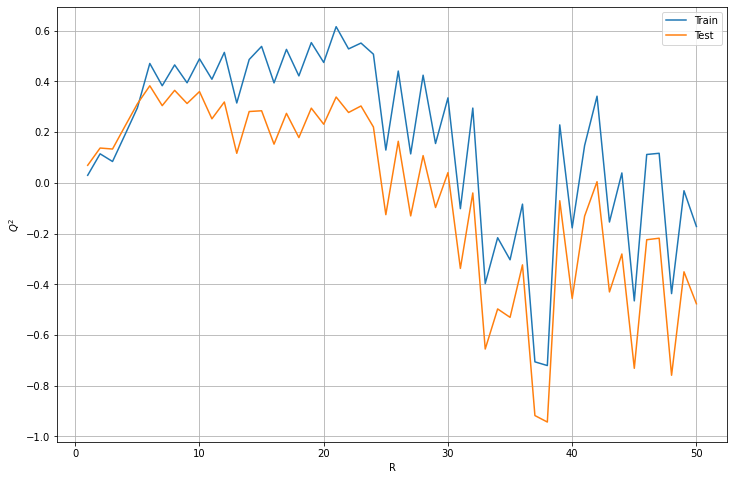

In [16]:
plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(range(1, len(Q2_list_train) + 1), Q2_list_train, label="Train")
plt.plot(range(1, len(Q2_list_test) + 1), Q2_list_test, label="Test")
plt.legend()
plt.xlabel("R")
plt.ylabel("$Q^2$")
plt.show()

In [17]:
np.array(Q2_list_train) - np.array(Q2_list_test)

array([-0.03938128, -0.02277799, -0.04919424, -0.03367948, -0.01588096,
        0.08808373,  0.07849618,  0.10036257,  0.08164588,  0.12927933,
        0.1559472 ,  0.19565742,  0.19844123,  0.20511532,  0.25393381,
        0.24166245,  0.25233918,  0.24334543,  0.25852391,  0.24362781,
        0.27740636,  0.25078585,  0.24815016,  0.28718256,  0.25484172,
        0.2768962 ,  0.24458245,  0.31715675,  0.25235969,  0.29492788,
        0.23553729,  0.33481857,  0.25837322,  0.28088879,  0.22705336,
        0.23955449,  0.21186579,  0.22279503,  0.29904145,  0.27859526,
        0.27851824,  0.33723745,  0.27576774,  0.31964758,  0.26588148,
        0.33630592,  0.33493524,  0.32202401,  0.31979437,  0.30470051])